In [35]:
import pandas as pd

In [36]:
pd.set_option('display.max_colwidth', 200)
data = pd.read_csv('data/SMSSpamCollection.csv')
data = data[['label', 'text']]
data.head()

,label,text
0,0,Go until jurong point
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry questionstd txt rateTCs apply 08452810075over18s
3,0,U dun say so early hor... U c already then say...
4,0,Nah I dont think he goes to usf


## Text Cleaning Pipeline

### Removing Punctuation

In [37]:
import string

In [38]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [39]:
data['text'] = data['text'].apply(str)

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
label    5574 non-null int64
text     5574 non-null object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [41]:
def remove_punctuation(text):
    text_no_punctuation = "".join([char for char in text if char not in string.punctuation])
    return text_no_punctuation

data['body_text_clean'] = data['text'].apply(lambda x: remove_punctuation(x))

data.head()

,label,text,body_text_clean
0,0,Go until jurong point,Go until jurong point
1,0,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry questionstd txt rateTCs apply 08452810075over18s,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive entry questionstd txt rateTCs apply 08452810075over18s
3,0,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say
4,0,Nah I dont think he goes to usf,Nah I dont think he goes to usf


## Tokenization

In [42]:
import re

In [43]:
def tokenize(text):
    tokens = re.split('\W+', text)
    return tokens

data['body_text_tokenized'] = data['body_text_clean'].apply(lambda x: tokenize(x.lower()))

In [44]:
data.head()

,label,text,body_text_clean,body_text_tokenized
0,0,Go until jurong point,Go until jurong point,"[go, until, jurong, point]"
1,0,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry questionstd txt rateTCs apply 08452810075over18s,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive entry questionstd txt rateTCs apply 08452810075over18s,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to, 87121, to, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]"
3,0,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, then, say]"
4,0,Nah I dont think he goes to usf,Nah I dont think he goes to usf,"[nah, i, dont, think, he, goes, to, usf]"


## Remove Stopwords

In [45]:
import nltk

In [46]:
stopword = nltk.corpus.stopwords.words('english')

In [47]:
def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopword]
    return text

data['body_text_no_stop'] = data['body_text_tokenized'].apply(lambda x: remove_stopwords(x))

In [48]:
data.head()

,label,text,body_text_clean,body_text_tokenized,body_text_no_stop
0,0,Go until jurong point,Go until jurong point,"[go, until, jurong, point]","[go, jurong, point]"
1,0,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry questionstd txt rateTCs apply 08452810075over18s,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive entry questionstd txt rateTCs apply 08452810075over18s,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to, 87121, to, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]"
3,0,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, then, say]","[u, dun, say, early, hor, u, c, already, say]"
4,0,Nah I dont think he goes to usf,Nah I dont think he goes to usf,"[nah, i, dont, think, he, goes, to, usf]","[nah, dont, think, goes, usf]"


## Stemming

### Porter Stemmer

In [49]:
ps = nltk.PorterStemmer()

In [50]:
# dir(ps)

In [51]:
#eg 
ps.stem('grows')

'grow'

In [52]:
ps.stem('growing')

'grow'

In [53]:
ps.stem('grow')

'grow'

In [54]:
# stem our text
def stemming(tokenized_text):
    text = [ps.stem(word) for word in tokenized_text]
    return text

data['body_text_stem'] = data['body_text_no_stop'].apply(lambda x: stemming(x))

data.head()

,label,text,body_text_clean,body_text_tokenized,body_text_no_stop,body_text_stem
0,0,Go until jurong point,Go until jurong point,"[go, until, jurong, point]","[go, jurong, point]","[go, jurong, point]"
1,0,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry questionstd txt rateTCs apply 08452810075over18s,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive entry questionstd txt rateTCs apply 08452810075over18s,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to, 87121, to, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv, entri, questionstd, txt, ratetc, appli, 08452810075over18]"
3,0,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, then, say]","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]"
4,0,Nah I dont think he goes to usf,Nah I dont think he goes to usf,"[nah, i, dont, think, he, goes, to, usf]","[nah, dont, think, goes, usf]","[nah, dont, think, goe, usf]"


## Lemmatization

#### WordNet Lemmatizer

In [55]:
wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()

In [56]:
# read in raw text
print(ps.stem('meanness'))
print(ps.stem('meaning'))

mean
mean


In [57]:
print(wn.lemmatize('meanness'))
print(wn.lemmatize('meaning'))

meanness
meaning


In [58]:
print(ps.stem('goose'))
print(ps.stem('geese'))

goos
gees


In [59]:
print(wn.lemmatize('goose'))
print(wn.lemmatize('geese'))

goose
goose


In [60]:
### lemmatize text in dataset
def lemmatizing(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

data['body_text_lemmatized'] = data['body_text_no_stop'].apply(lambda x: lemmatizing(x))
data.head()

,label,text,body_text_clean,body_text_tokenized,body_text_no_stop,body_text_stem,body_text_lemmatized
0,0,Go until jurong point,Go until jurong point,"[go, until, jurong, point]","[go, jurong, point]","[go, jurong, point]","[go, jurong, point]"
1,0,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry questionstd txt rateTCs apply 08452810075over18s,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive entry questionstd txt rateTCs apply 08452810075over18s,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to, 87121, to, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv, entri, questionstd, txt, ratetc, appli, 08452810075over18]","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]"
3,0,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, then, say]","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]","[u, dun, say, early, hor, u, c, already, say]"
4,0,Nah I dont think he goes to usf,Nah I dont think he goes to usf,"[nah, i, dont, think, he, goes, to, usf]","[nah, dont, think, goes, usf]","[nah, dont, think, goe, usf]","[nah, dont, think, go, usf]"


In [67]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopword]
    return text

## Vectorization

#### Count Vectorization

In [68]:
# create document-term matrix where the entryo f each cell be a count of the number f times that word occured in that document.

In [69]:
from sklearn.feature_extraction.text import CountVectorizer

In [70]:
count_vect = CountVectorizer(analyzer=clean_text)

In [71]:
X_counts = count_vect.fit_transform(data['text'])

In [76]:
print(X_counts.shape)
# print(count_vect.get_feature_names())


(5574, 6868)


In [77]:
# apply countVectorizer to smaller sample

In [78]:
data_sample = data.head(20)

In [80]:
# data_sample

In [81]:
count_vect_sample = CountVectorizer(analyzer=clean_text)
X_count_sample = count_vect_sample.fit_transform(data_sample['text'])

In [82]:
print(X_count_sample.shape)

(20, 170)


In [83]:
print(count_vect_sample.get_feature_names())

['08002986030', '08452810075over18', '09061701461', '1', '100', '11', '12', '2', '20', '2005', '21st', '3', '87077', '87121', '9', '900', 'aid', 'alreadi', 'anymor', 'appli', 'b', 'back', 'bless', 'breather', 'brother', 'c', 'call', 'caller', 'callertun', 'camera', 'cash', 'chanc', 'chg', 'claim', 'co', 'code', 'colour', 'comp', 'copi', 'credit', 'cup', 'custom', 'darl', 'date', 'dont', 'dun', 'earli', 'eg', 'eh', 'england', 'entitl', 'entri', 'even', 'fa', 'feel', 'final', 'fine', 'free', 'freemsg', 'friend', 'fulfil', 'fun', 'go', 'goalsteam', 'goe', 'gonna', 'gota', 'grant', 'help', 'hey', 'home', 'hor', 'hour', 'id', 'im', 'ive', 'joke', 'jurong', 'kim', 'kl341', 'lar', 'latest', 'like', 'macedonia', 'make', 'may', 'mell', 'membership', 'minnaminungint', 'miss', 'mobil', 'month', 'nah', 'name', 'nation', 'naughti', 'network', 'news', 'nurungu', 'oh', 'ok', 'oni', 'oru', 'patent', 'per', 'point', 'press', 'prize', 'promis', 'questionstd', 'r', 'ratetc', 'receiv', 'receivea', 'rememb

In [84]:
# vectorizers output sparse matrices
# sparse matrix is a matrix in which most entries are 0. In the interest of efficient storage, a sparse matrix will be stored by only storing the locations oof the non-zero elements

In [85]:
X_count_sample

<20x170 sparse matrix of type '<class 'numpy.int64'>'
	with 188 stored elements in Compressed Sparse Row format>

In [87]:
# getting the document term matrix
X_counts_df  = pd.DataFrame(X_count_sample.toarray())
X_counts_df

,0,1,2,3,4,5,6,7,8,9,...,160,161,162,163,164,165,166,167,168,169
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,1,0,1,...,0,1,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
# getting the actual column names
X_counts_df.columns = count_vect_sample.get_feature_names()

In [89]:
X_counts_df

,08002986030,08452810075over18,09061701461,1,100,11,12,2,20,2005,...,wif,win,winner,wkli,wonder,wont,word,xxx,xxxmobilemovieclub,ye
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,1,0,1,...,0,1,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## N-Grams

In [90]:
# create a document-term matrix where counts still occupy the cell, but instead of the coumns represeting
# single terms, they represent all combinations of adjacent words of length n in your text

In [91]:
def clean_text_for_ngrams(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = " ".join([ps.stem(word) for word in tokens if word not in stopword])
    return text

data['ngram_cleaned_text'] = data['text'].apply(lambda x: clean_text_for_ngrams(x))
data.head()

,label,text,body_text_clean,body_text_tokenized,body_text_no_stop,body_text_stem,body_text_lemmatized,ngram_cleaned_text
0,0,Go until jurong point,Go until jurong point,"[go, until, jurong, point]","[go, jurong, point]","[go, jurong, point]","[go, jurong, point]",go jurong point
1,0,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]","[ok, lar, joking, wif, u, oni]",ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry questionstd txt rateTCs apply 08452810075over18s,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive entry questionstd txt rateTCs apply 08452810075over18s,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to, 87121, to, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv, entri, questionstd, txt, ratetc, appli, 08452810075over18]","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]",free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri questionstd txt ratetc appli 08452810075over18
3,0,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, then, say]","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]","[u, dun, say, early, hor, u, c, already, say]",u dun say earli hor u c alreadi say
4,0,Nah I dont think he goes to usf,Nah I dont think he goes to usf,"[nah, i, dont, think, he, goes, to, usf]","[nah, dont, think, goes, usf]","[nah, dont, think, goe, usf]","[nah, dont, think, go, usf]",nah dont think goe usf


In [92]:
# Apply CountVectorizer with respect to n-grams
ngram_vect = CountVectorizer(ngram_range=(2,2))
X1_counts = ngram_vect.fit_transform(data['ngram_cleaned_text'])


In [94]:
print(X1_counts.shape)

(5574, 24780)


In [96]:
# print(ngram_vect.get_feature_names())

In [97]:
# apply n-grams to smaller sample
ngram_data_sample = data.head(20)
ngram_vect_sample = CountVectorizer(ngram_range=(2,2))
ngram_x_counts = ngram_vect_sample.fit_transform(ngram_data_sample['text'])
print(ngram_x_counts.shape)

(20, 269)


In [99]:
ngram_vect_sample.get_feature_names()[0:10]

['09061701461 claim',
 '100 to',
 '11 months',
 '12 hours',
 '2005 text',
 '21st may',
 '87077 eg',
 '87077 trywales',
 '87121 to',
 '900 prize']

In [102]:
# sparse matrix
ngram_counts_df = pd.DataFrame(ngram_x_counts.toarray())
ngram_counts_df.columns = ngram_vect_sample.get_feature_names()
ngram_counts_df

,09061701461 claim,100 to,11 months,12 hours,2005 text,21st may,87077 eg,87077 trywales,87121 to,900 prize,...,yes did,you for,you have,you up,your callertune,your credit,your friends,your help,your mobile,your request
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
8,1,0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## TF-IDF Vectorizer

In [103]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [104]:
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data['text'])
print(X_tfidf.shape)

(5574, 6868)


In [105]:
# Apply TfidfVectorizer to smaller sample
tfidf_data_sample = data.head(20)
tfidf_vect_sample = TfidfVectorizer(analyzer=clean_text)
X_tfidf_sample = tfidf_vect_sample.fit_transform(tfidf_data_sample['text'])
print(X_tfidf_sample.shape)
print(tfidf_vect_sample.get_feature_names())

(20, 170)
['08002986030', '08452810075over18', '09061701461', '1', '100', '11', '12', '2', '20', '2005', '21st', '3', '87077', '87121', '9', '900', 'aid', 'alreadi', 'anymor', 'appli', 'b', 'back', 'bless', 'breather', 'brother', 'c', 'call', 'caller', 'callertun', 'camera', 'cash', 'chanc', 'chg', 'claim', 'co', 'code', 'colour', 'comp', 'copi', 'credit', 'cup', 'custom', 'darl', 'date', 'dont', 'dun', 'earli', 'eg', 'eh', 'england', 'entitl', 'entri', 'even', 'fa', 'feel', 'final', 'fine', 'free', 'freemsg', 'friend', 'fulfil', 'fun', 'go', 'goalsteam', 'goe', 'gonna', 'gota', 'grant', 'help', 'hey', 'home', 'hor', 'hour', 'id', 'im', 'ive', 'joke', 'jurong', 'kim', 'kl341', 'lar', 'latest', 'like', 'macedonia', 'make', 'may', 'mell', 'membership', 'minnaminungint', 'miss', 'mobil', 'month', 'nah', 'name', 'nation', 'naughti', 'network', 'news', 'nurungu', 'oh', 'ok', 'oni', 'oru', 'patent', 'per', 'point', 'press', 'prize', 'promis', 'questionstd', 'r', 'ratetc', 'receiv', 'receivea

In [107]:
X_tfidf_df = pd.DataFrame(X_tfidf_sample.toarray())
X_tfidf_df.columns = tfidf_vect_sample.get_feature_names()
X_tfidf_df

,08002986030,08452810075over18,09061701461,1,100,11,12,2,20,2005,...,wif,win,winner,wkli,wonder,wont,word,xxx,xxxmobilemovieclub,ye
0,0.0000,0.000000,0.000000,0.00000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
1,0.0000,0.000000,0.000000,0.00000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,...,0.437499,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
2,0.0000,0.196316,0.000000,0.00000,0.000000,0.0000,0.000000,0.172565,0.000000,0.196316,...,0.000000,0.172565,0.000000,0.196316,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
3,0.0000,0.000000,0.000000,0.00000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
4,0.0000,0.000000,0.000000,0.00000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
5,0.0000,0.000000,0.000000,0.00000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.219134,0.249295,0.00000,0.000000
6,0.0000,0.000000,0.000000,0.00000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
7,0.0000,0.000000,0.000000,0.00000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
8,0.0000,0.000000,0.224889,0.00000,0.000000,0.0000,0.224889,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.224889,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
9,0.1971,0.000000,0.000000,0.00000,0.000000,0.1971,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000


## Feature Engineering

In [109]:
data.head()

,label,text,body_text_clean,body_text_tokenized,body_text_no_stop,body_text_stem,body_text_lemmatized,ngram_cleaned_text
0,0,Go until jurong point,Go until jurong point,"[go, until, jurong, point]","[go, jurong, point]","[go, jurong, point]","[go, jurong, point]",go jurong point
1,0,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]","[ok, lar, joking, wif, u, oni]",ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry questionstd txt rateTCs apply 08452810075over18s,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive entry questionstd txt rateTCs apply 08452810075over18s,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to, 87121, to, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv, entri, questionstd, txt, ratetc, appli, 08452810075over18]","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]",free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri questionstd txt ratetc appli 08452810075over18
3,0,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, then, say]","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]","[u, dun, say, early, hor, u, c, already, say]",u dun say earli hor u c alreadi say
4,0,Nah I dont think he goes to usf,Nah I dont think he goes to usf,"[nah, i, dont, think, he, goes, to, usf]","[nah, dont, think, goes, usf]","[nah, dont, think, goe, usf]","[nah, dont, think, go, usf]",nah dont think goe usf


In [110]:
# Creating a feature for text message length
data['body_len'] = data['text'].apply(lambda x: len(x) - x.count(" "))
data.head()

,label,text,body_text_clean,body_text_tokenized,body_text_no_stop,body_text_stem,body_text_lemmatized,ngram_cleaned_text,body_len
0,0,Go until jurong point,Go until jurong point,"[go, until, jurong, point]","[go, jurong, point]","[go, jurong, point]","[go, jurong, point]",go jurong point,18
1,0,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]","[ok, lar, joking, wif, u, oni]",ok lar joke wif u oni,24
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry questionstd txt rateTCs apply 08452810075over18s,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive entry questionstd txt rateTCs apply 08452810075over18s,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to, 87121, to, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv, entri, questionstd, txt, ratetc, appli, 08452810075over18]","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]",free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri questionstd txt ratetc appli 08452810075over18,123
3,0,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, then, say]","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]","[u, dun, say, early, hor, u, c, already, say]",u dun say earli hor u c alreadi say,39
4,0,Nah I dont think he goes to usf,Nah I dont think he goes to usf,"[nah, i, dont, think, he, goes, to, usf]","[nah, dont, think, goes, usf]","[nah, dont, think, goe, usf]","[nah, dont, think, go, usf]",nah dont think goe usf,24


In [132]:
# creating a feature for percentage of text that is punctuation
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
#     return round((count / (len(text) - text.count(" "))), 3) * 100
    return count

data['body_punct_%'] = data['text'].apply(lambda x: round(count_punct(x) / len(x), 3) * 100)

In [133]:
data.head()

,label,text,body_text_clean,body_text_tokenized,body_text_no_stop,body_text_stem,body_text_lemmatized,ngram_cleaned_text,body_len,body_punct_%
0,0,Go until jurong point,Go until jurong point,"[go, until, jurong, point]","[go, jurong, point]","[go, jurong, point]","[go, jurong, point]",go jurong point,18,0.0
1,0,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]","[ok, lar, joking, wif, u, oni]",ok lar joke wif u oni,24,20.7
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry questionstd txt rateTCs apply 08452810075over18s,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive entry questionstd txt rateTCs apply 08452810075over18s,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to, 87121, to, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv, entri, questionstd, txt, ratetc, appli, 08452810075over18]","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]",free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri questionstd txt ratetc appli 08452810075over18,123,0.7
3,0,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, then, say]","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]","[u, dun, say, early, hor, u, c, already, say]",u dun say earli hor u c alreadi say,39,12.2
4,0,Nah I dont think he goes to usf,Nah I dont think he goes to usf,"[nah, i, dont, think, he, goes, to, usf]","[nah, dont, think, goes, usf]","[nah, dont, think, goe, usf]","[nah, dont, think, go, usf]",nah dont think goe usf,24,0.0


In [134]:
# evaluate created features

In [135]:
from matplotlib import pyplot
import numpy as np

/home/ghaff/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


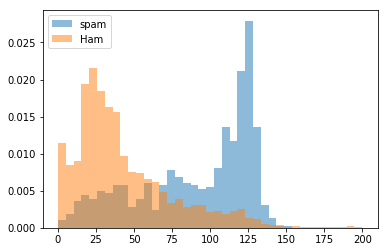

In [137]:
bins = np.linspace(0, 200, 40)
pyplot.hist(data[data['label'] == 1]['body_len'], bins, alpha=0.5, normed=True, label='spam')
pyplot.hist(data[data['label'] == 0]['body_len'], bins, alpha=0.5, normed=True, label="Ham")
pyplot.legend(loc='upper left')
pyplot.show()

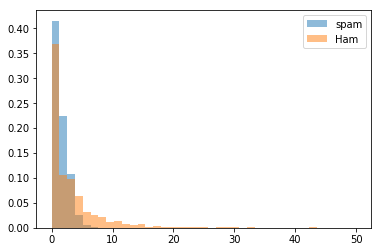

In [139]:
bins = np.linspace(0, 50, 40)
pyplot.hist(data[data['label'] == 1]['body_punct_%'], bins, alpha=0.5, normed=True, label='spam')
pyplot.hist(data[data['label'] == 0]['body_punct_%'], bins, alpha=0.5, normed=True, label="Ham")
pyplot.legend(loc='upper right')
pyplot.show()

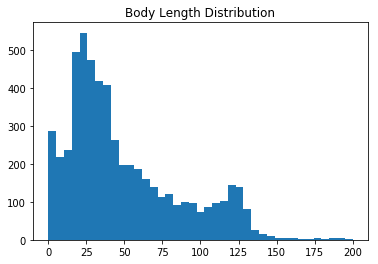

In [140]:
# Identifying features for transformation
bins = np.linspace(0,200,40)
pyplot.hist(data['body_len'], bins)
pyplot.title('Body Length Distribution')
pyplot.show()

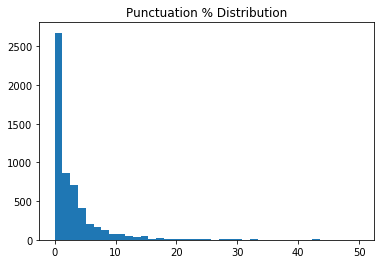

In [144]:
bins = np.linspace(0,50,40)
pyplot.hist(data['body_punct_%'], bins)
pyplot.title('Punctuation % Distribution')
pyplot.show()